In [20]:
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from joblib import Parallel, delayed
import multiprocessing

%matplotlib inline
import mpld3
#mpld3.enable_notebook()

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
df = pd.read_pickle('data/formated_train_data_20l.pkl')

print df.shape
df.head(20)

(7578080, 13)


,x1,x2,x3,x4,x5,x6,x7,x8,point_id,point_label,probe_id,probe_label,sim
0,2732.521729,0,0,0,0,0,0,0,41004,13721,7490,13721,1
1,2544.442139,0,0,0,0,0,0,0,29667,26694,7490,13721,0
2,2538.058105,0,0,0,0,0,0,0,130431,7610,7490,13721,0
3,2537.544189,0,0,0,0,0,0,0,116675,65463,7490,13721,0
4,2533.375488,0,0,0,0,0,0,0,127651,17181,7490,13721,0
5,2527.897705,0,0,0,0,0,0,0,69335,51818,7490,13721,0
6,2522.609863,0,0,0,0,0,0,0,128410,57058,7490,13721,0
7,2522.419434,0,0,0,0,0,0,0,84230,56302,7490,13721,0
8,2521.382568,0,0,0,0,0,0,0,3121,18531,7490,13721,0
9,2520.702881,0,0,0,0,0,0,0,104012,51623,7490,13721,0


In [18]:
def build_distribs(probe_id, group):
    
    cols = ['x'+str(i+1) for i in range(8)]
    
    idn = []
    for col in cols:
        g = group[group[col]!=0].reset_index()
        try:
            pos = np.asarray(g.index[g['sim'] == 1])[0]
        except IndexError:
            pos = 100
        idn.append(pos)
        
    return idn

In [21]:
groups = df.groupby('probe_id')

# parallelization
num_cores = multiprocessing.cpu_count()
posdistrib = Parallel(n_jobs=num_cores - 8)(delayed(build_distribs)(probe_id, group) for probe_id, group in groups)

(47363, 8)


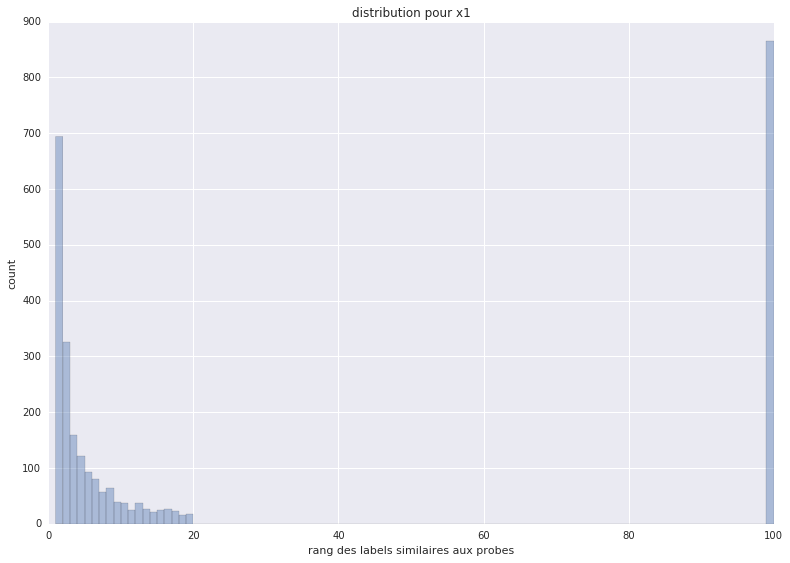

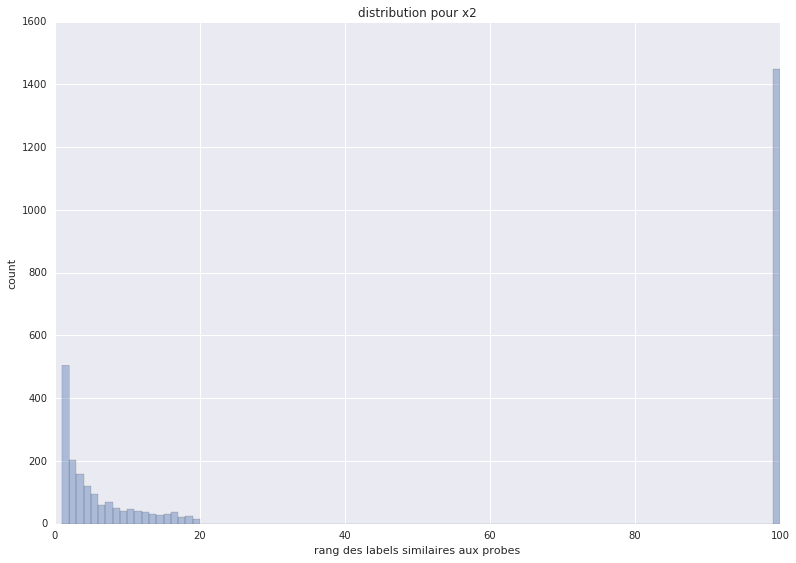

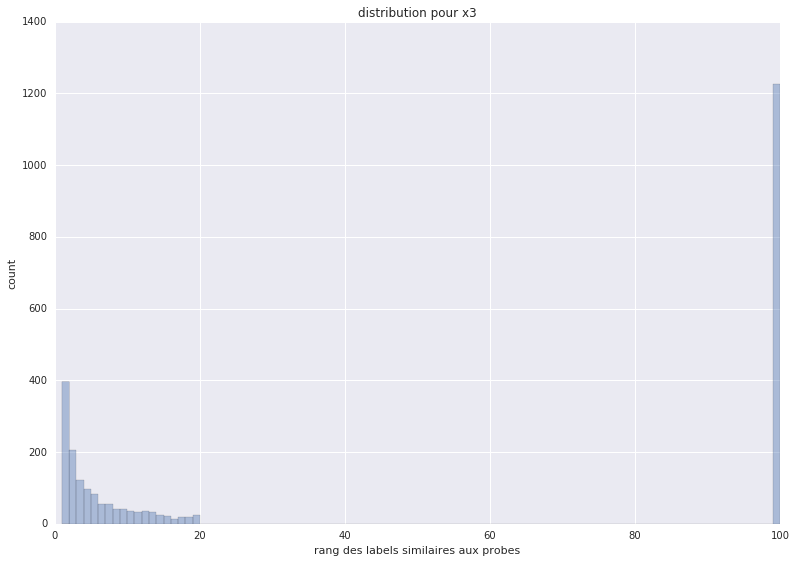

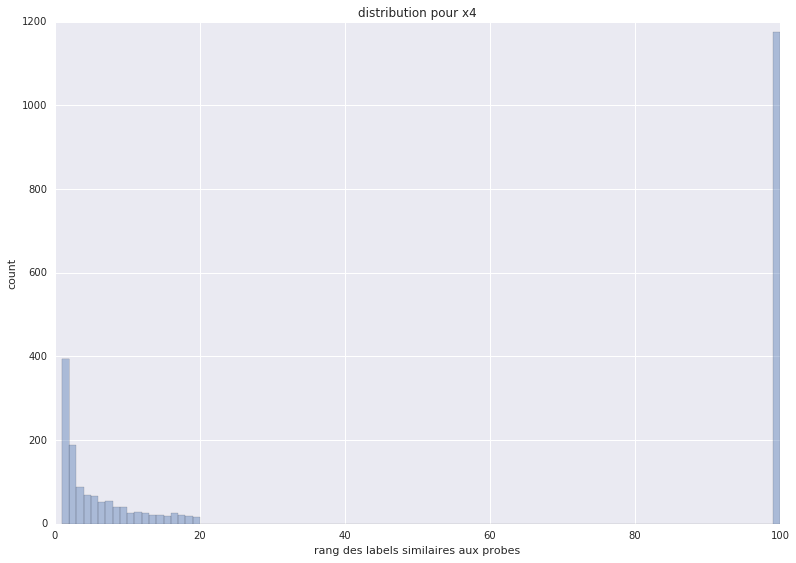

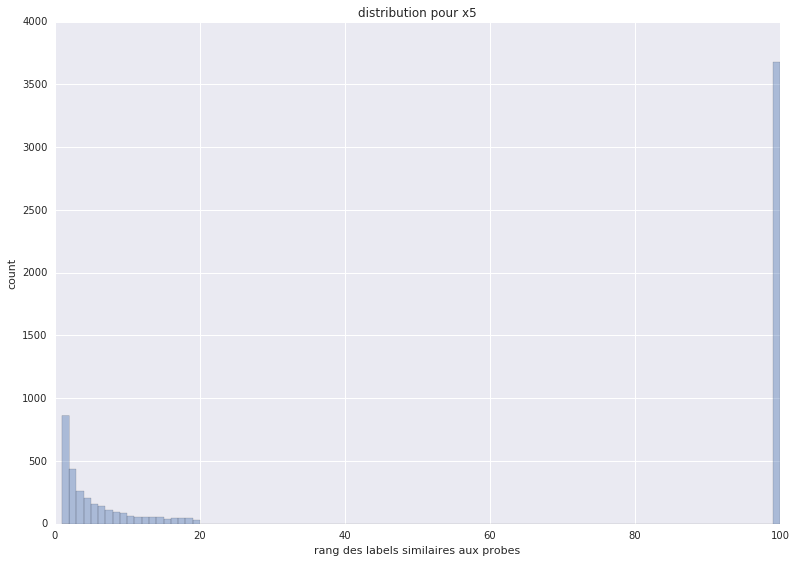

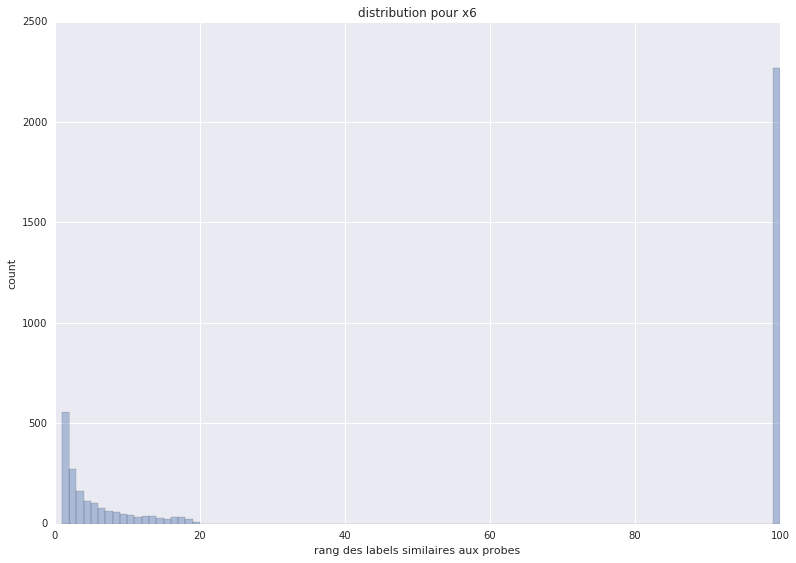

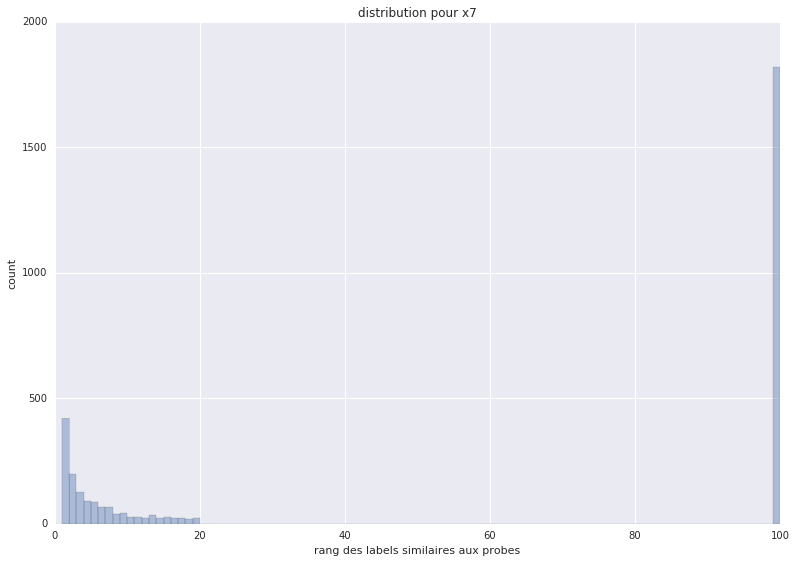

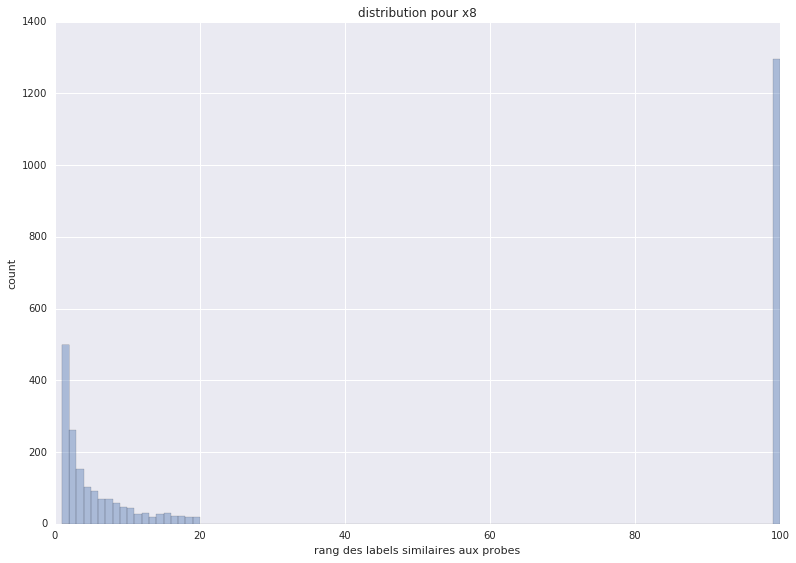

In [24]:
posdistrib2 = np.asarray(posdistrib)

print posdistrib2.shape

bins = range(1,101)

for i in range(8):
    fig = plt.figure(figsize=(13,9))
    ax = fig.gca()
    sns.distplot(posdistrib2[:,i], bins=bins, kde=False, hist=True, ax=ax)
    ax.set_xlabel('rang des labels similaires aux probes')
    ax.set_ylabel('count')
    ax.set_title('distribution pour x'+str(i+1))
